In [ ]:
!pip3 install numpy
!pip3 install pandas
!pip3 install tensorflow
!pip3 install scikit-learn
!pip3 install pillow
!pip3 install matplotlib


# Introduction and Problem Statement

In [11]:
import os, pickle, warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from PIL import Image

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)


# Import, EDA, and Cleaning

In [3]:



def image_to_array(id, data_type="train"):
    with Image.open(f"files/{data_type}/{id}.tif") as im:
        return np.array(im)


try:
    #Check if the dataframe with images as arrays has already been created
    train = pd.read_pickle("files/training_set.pkl")
except:
    #If Not, create the the whole thing from scratch
    train = pd.read_csv("files/train_labels.csv")  # contains id and label columns
    train["image"] = train["id"].apply(image_to_array)
    # Save This so it can be loaded quickly if needed. It takes a few minutes and doesn't need to be repeated each time environment loads
    train.to_pickle("files/training_set.pkl")


try:
    #Check if the dataframe with images as arrays has already been created
    test = pd.read_pickle("files/testing_set.pkl")
except:
    #If Not, create the the whole thing from scratch
    testing_ids = [p.replace(".tif", "") for p in os.listdir("files/test") if ".tif" in p]
    test = pd.DataFrame()
    test["id"] = testing_ids
    test["image"] = test["id"].apply(lambda x: image_to_array(x, "test"))
    # Save This so it can be loaded quickly if needed. It takes a few minutes and doesn't need to be repeated each time environment loads
    test.to_pickle("files/testing_set.pkl")


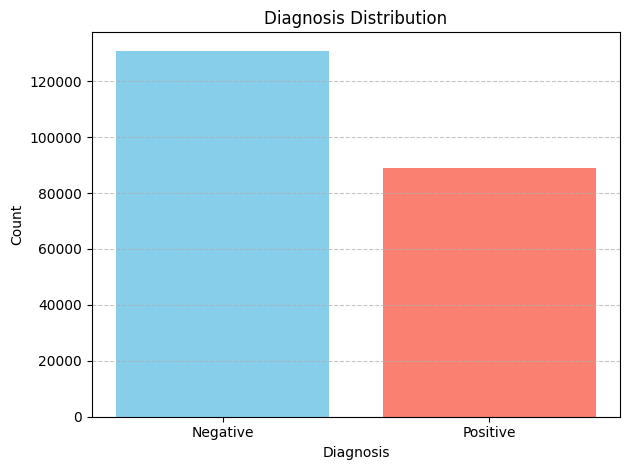

In [4]:
negative_ids,positive_ids = train[train["label"] == 0]["id"], train[train["label"] == 1]["id"]
counts = [len(negative_ids), len(positive_ids)]

# Labels for the bars
labels = ["Negative", "Positive"]

# Create bar chart
plt.bar(labels, counts, color=["skyblue", "salmon"])
plt.title("Diagnosis Distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

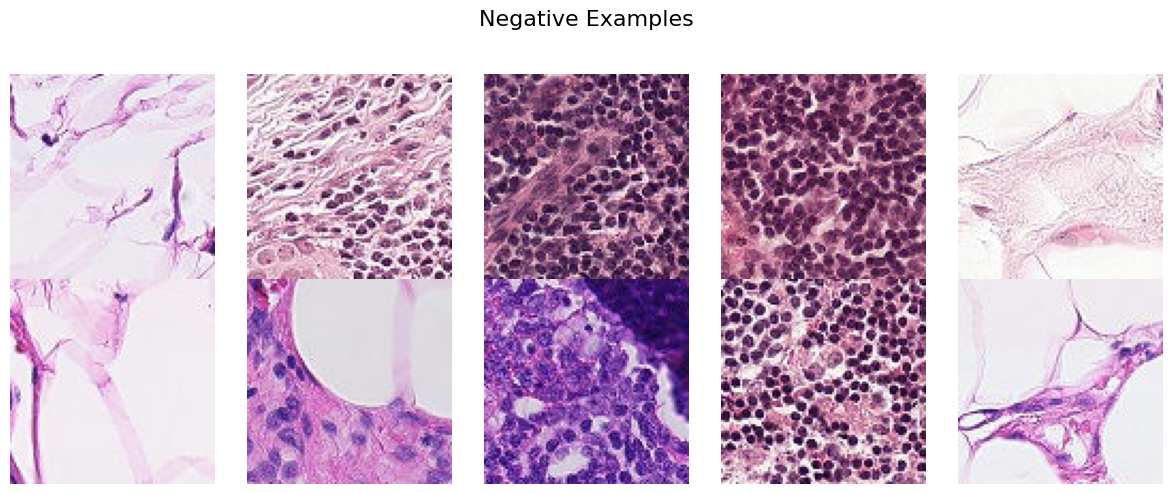

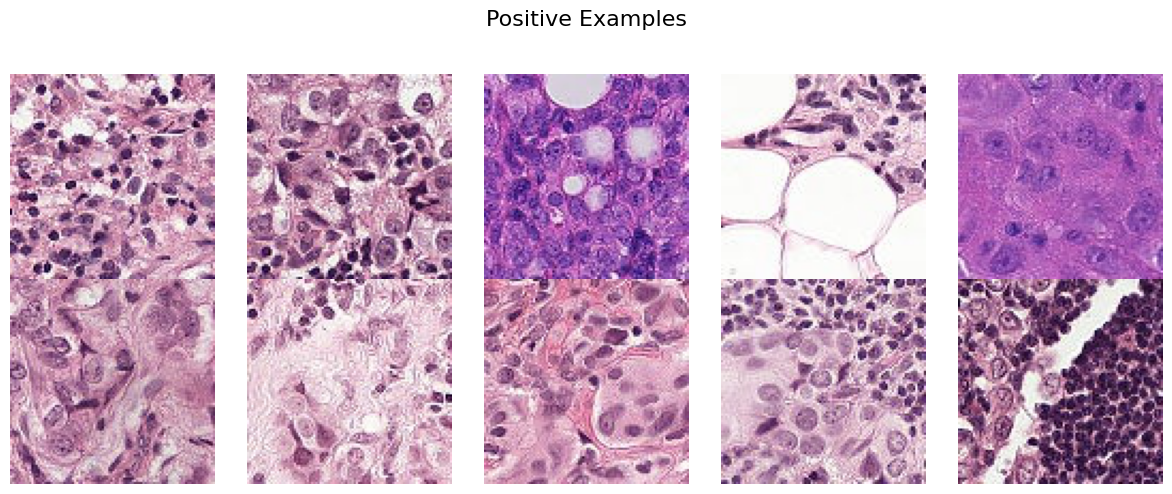

In [52]:


def plot_image_grid(image_paths, title, rows=2, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 5))
    fig.suptitle(title, fontsize=16)
    
    for i, ax in enumerate(axes.flat):
        if i < len(image_paths):
            img = Image.open(image_paths[i])
            ax.imshow(img, cmap="gray")
            ax.axis("off")
        else:
            ax.axis("off")
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Make room for title
    plt.show()

# Show positive and negative image grids
plot_image_grid([f"files/train/{s}.tif" for s in negative_ids.sample(10).values], "Negative Examples")
plot_image_grid([f"files/train/{s}.tif" for s in positive_ids.sample(10).values], "Positive Examples")


In [5]:
X_train = np.stack(train["image"].values, axis=0).astype("float32") / 255.0
y_train = train["label"].values


# Modeling and Architecture

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(96, 96, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])
model.compile( optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


batch_size = 32
epochs = 10

history = model.fit(
    X_train,        
    y_train,        
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1  
)

In [ ]:
print(history.history["loss"])
print(history.history["accuracy"])
print(history.history["val_loss"])
print(history.history["val_accuracy"])

#Save the files in case the kernel or venv crashes so I don't have to re-train
model.save("files/model1.keras")
with open("files/history1.pkl", "wb") as f:
    pickle.dump(history.history, f)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(96, 96, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])
model.compile( optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


batch_size = 32
epochs = 12

history = model.fit(
    X_train,        
    y_train,        
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1  
)

Epoch 1/12
6189/6189 ━━━━━━━━━━━━━━━━━━━━ 456s 74ms/step - accuracy: 0.7864 - loss: 0.4633 - val_accuracy: 0.8437 - val_loss: 0.3617
Epoch 2/12
6189/6189 ━━━━━━━━━━━━━━━━━━━━ 534s 86ms/step - accuracy: 0.8538 - loss: 0.3433 - val_accuracy: 0.8686 - val_loss: 0.3125
Epoch 3/12
6189/6189 ━━━━━━━━━━━━━━━━━━━━ 594s 96ms/step - accuracy: 0.8777 - loss: 0.2912 - val_accuracy: 0.8792 - val_loss: 0.2938
Epoch 4/12
6189/6189 ━━━━━━━━━━━━━━━━━━━━ 586s 95ms/step - accuracy: 0.8918 - loss: 0.2597 - val_accuracy: 0.8736 - val_loss: 0.3109
Epoch 5/12
6189/6189 ━━━━━━━━━━━━━━━━━━━━ 605s 98ms/step - accuracy: 0.9044 - loss: 0.2309 - val_accuracy: 0.8752 - val_loss: 0.3113
Epoch 6/12
6189/6189 ━━━━━━━━━━━━━━━━━━━━ 584s 94ms/step - accuracy: 0.9185 - loss: 0.1979 - val_accuracy: 0.8749 - val_loss: 0.3231
Epoch 7/12
6189/6189 ━━━━━━━━━━━━━━━━━━━━ 575s 93ms/step - accuracy: 0.9334 - loss: 0.1674 - val_accuracy: 0.8719 - val_loss: 0.3413
Epoch 8/12
6189/6189 ━━━━━━━━━━━━━━━━━━━━ 575s 93ms/step - accuracy: 

In [ ]:

print(history.history["loss"])
print(history.history["accuracy"])
print(history.history["val_loss"])
print(history.history["val_accuracy"])

#Save the files in case the kernel or venv crashes so I don't have to re-train
model.save("files/model2.keras")
with open("files/history2.pkl", "wb") as f:
    pickle.dump(history.history, f)

[0.42113274335861206, 0.33046600222587585, 0.2907247245311737, 0.26189640164375305, 0.2338906228542328, 0.2044629156589508, 0.17448870837688446, 0.1431749314069748, 0.11144981533288956, 0.08614221215248108, 0.06875304132699966, 0.05681255832314491]
[0.811924934387207, 0.8600407838821411, 0.8780186176300049, 0.8909515142440796, 0.903439998626709, 0.9165042042732239, 0.9302956461906433, 0.9437032341957092, 0.9575148224830627, 0.9683873653411865, 0.9753562808036804, 0.9801486730575562]
[0.3617287576198578, 0.3125457465648651, 0.2938098907470703, 0.3109053671360016, 0.31132179498672485, 0.32312479615211487, 0.34126731753349304, 0.3802122175693512, 0.4461483359336853, 0.5344353318214417, 0.6634388566017151, 0.6766645908355713]
[0.8437485694885254, 0.868608832359314, 0.8791983127593994, 0.8736081719398499, 0.8751533627510071, 0.8748806715011597, 0.8718811273574829, 0.8656092286109924, 0.8662909865379333, 0.8630186915397644, 0.8671090602874756, 0.8590646982192993]


In [20]:
test["label"] = model.predict(np.stack(test["image"].values, axis=0).astype("float32") / 255.0)
test["label"] = test["label"].apply(lambda x: x > 0.5).astype(int)

test[["id", "label"]].to_csv("files/kaggle_output2.csv", index=False)

1796/1796 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step


# Results and Analysis
2 Versions

# Conclusion